In [1]:
#from skimpy import skim #data summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import charset_normalizer
import seaborn as sns
import plotly.express as px #interactive visualization
import charset_normalizer
from plotly.subplots import make_subplots
from matplotlib.ticker import FuncFormatter


In [2]:
with open("visualizing_global_co2_data_cleaned.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}


In [3]:
data = pd.read_csv('visualizing_global_co2_data_cleaned.csv', encoding = 'ascii')
df = pd.DataFrame(data)


In [4]:
#skim(df)

In [5]:
 info = pd.DataFrame({
    "Count":df.shape[0],
    "Null":df.isnull().sum(),
    "Null %":df.isnull().mean() * 100,
    "Zeros":(df == 0).sum(),
    "Zeros %":(df == 0).mean() * 100,
    "Unique":df.nunique(),
    "Duplicated":(df.duplicated() == True).sum(),
  
})
info
print(df["country"].nunique())

print(df["iso_code"].nunique())
print(df["country"].unique())


237
219
['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia'
 'Asia (excl. China and India)' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Europe'
 'Europe (excl. EU-27)' 'Europe (excl. EU-28)' 'European Union (27)'
 'European Union (28)' 'Faroe Islands' '

In [6]:
non_countries = [
    "Africa", "Asia", "Asia (excl. China and India)", "Europe", "Europe (excl. EU-27)",
    "Europe (excl. EU-28)", "European Union (27)", "European Union (28)", 
    "High-income countries", "Low-income countries", "Lower-middle-income countries", 
    "North America", "North America (excl. USA)", "Oceania", "South America", "World"
]

countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
    'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
    'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
    'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
    'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
    'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
    'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
    'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
    'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
    'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Lao People’s Democratic Republic',
    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar',
    'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico',
    'Micronesia (Federated States of)', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
    'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru',
    'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Rwanda',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino',
    'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste',
    'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
    'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United Republic of Tanzania',
    'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'
]

df_filtered_country = df[df["country"].isin(countries)].copy()

print(df_filtered_country["country"].unique())
print(df_filtered_country["country"].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan'
 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon' 'Lesotho'
 'Liberia' 'Libya' 'Liechtenste

#Eliminar datos C02 = 0

In [8]:
co2_zeros = (df["co2"] == 0).sum()

df = df.drop(df[df["co2"] == 0].index)
print(co2_zeros)

102


In [9]:
df_it1 = df[["country","year","co2","co2_including_luc"]]


info1 = pd.DataFrame({
    "Count":df_it1.shape[0],
    "Null":df_it1.isnull().sum(),
    "Null %":df_it1.isnull().mean() * 100,
    "Zeros":(df_it1 == 0).sum(),
    "Zeros %":(df_it1 == 0).mean() * 100,
    "Unique":df_it1.nunique(),
    "Duplicated":(df_it1.duplicated() == True).sum(),
    "Under Zeros":(df_it1["co2_including_luc"] < 0).sum() 
})
info1

,Count,Null,Null %,Zeros,Zeros %,Unique,Duplicated,Under Zeros
country,23392,0,0.000000,0,0.0000,237,0,369
year,23392,0,0.000000,0,0.0000,172,0,369
co2,23392,0,0.000000,0,0.0000,14458,0,369
co2_including_luc,23392,953,4.074042,8,0.0342,18675,0,369


In [10]:

df_it1 = df[[ "year", "co2", "co2_including_luc"]].copy()


info1 = pd.DataFrame({
    "Count": [df_it1.shape[0]] * len(df_it1.columns),
    "Null": df_it1.isnull().sum(),
    "Null %": df_it1.isnull().mean() * 100,
    "Zeros": (df_it1 == 0).sum(),
    "Zeros %": (df_it1 == 0).mean() * 100,
    "Unique": df_it1.nunique(),
    "Duplicated": [df_it1.duplicated().sum()] * len(df_it1.columns),
    "Under Zeros": (df_it1 < 0).sum()
}, index=df_it1.columns)

print(info1)
df_it1["country"] =df["country"]
df_it1.columns

                   Count  Null    Null %  Zeros  Zeros %  Unique  Duplicated  \
year               23392     0  0.000000      0   0.0000     172         132   
co2                23392     0  0.000000      0   0.0000   14458         132   
co2_including_luc  23392   953  4.074042      8   0.0342   18675         132   

                   Under Zeros  
year                         0  
co2                          0  
co2_including_luc          369  


Index(['year', 'co2', 'co2_including_luc', 'country'], dtype='object')

Imputamos el valor de Co2 a co2_including_luc, cuando co2_including_luc < 0

### Which sectors are most responsible for emissions, and how has their
### contribution varied over the decades?

In [13]:
df_it2 = df[[ "year", "coal_co2", "gas_co2", "oil_co2"]].copy()

info2 = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info2)

          Count  Null    Null %  Zeros    Zeros %  Unique  Duplicated  \
year      23392     0  0.000000      0   0.000000     172         984   
coal_co2  23392     0  0.000000   6719  28.723495   10076         984   
gas_co2   23392    27  0.115424  14120  60.362517    6168         984   
oil_co2   23392     0  0.000000   2335   9.982045   10528         984   

          Under Zeros  
year                0  
coal_co2            0  
gas_co2             0  
oil_co2             0  


#Total Co2 agrupado en años

## histograma de valores nulos de cement

            Count  Null  Null %  Zeros  Zeros %  Unique  Duplicated  \
year         3481     0     0.0      0      0.0     131        3350   
cement_co2   3481  3481   100.0      0      0.0       0        3350   

            Under Zeros  
year                  0  
cement_co2            0  


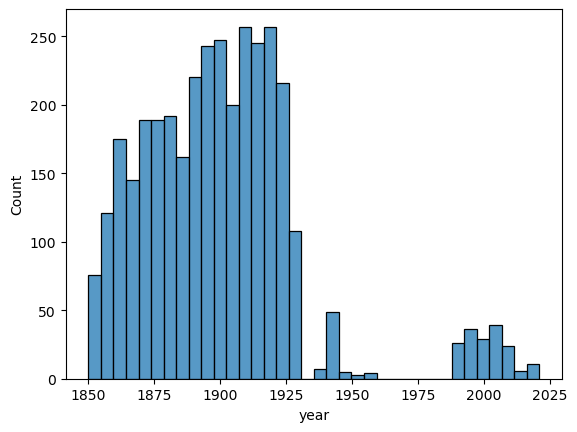

In [16]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]
df_cement_nulls.head()

info_cement = pd.DataFrame({
    "Count": [df_cement_nulls.shape[0]] * len(df_cement_nulls.columns),
    "Null": df_cement_nulls.isnull().sum(),
    "Null %": df_cement_nulls.isnull().mean() * 100,
    "Zeros": (df_cement_nulls == 0).sum(),
    "Zeros %": (df_cement_nulls == 0).mean() * 100,
    "Unique": df_cement_nulls.nunique(),
    "Duplicated": [df_cement_nulls.duplicated().sum()] * len(df_cement_nulls.columns),
    "Under Zeros": (df_cement_nulls < 0).sum()
}, index=df_cement_nulls.columns)

print(info_cement)

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

## Después de comprobar los datos nulos y ver su irrelevancia, procedemos a eliminarlos.

In [18]:
df = df[~(df['cement_co2'].isnull() & (df['year'] > 1930))]
df

,country,year,iso_code,population,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,...,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o
0,Afghanistan,1949,AFG,7356890.0,0.000,0.000,0.015,NaN,NaN,8.039,...,0.000,NaN,0.0,0.160,0.000,0.129,0.000,0.000,0.000,0.0
1,Afghanistan,1950,AFG,7480464.0,0.000,0.000,0.084,0.070,475.000,8.585,...,0.000,0.0,0.0,0.157,0.004,0.129,0.000,0.000,0.000,0.0
2,Afghanistan,1951,AFG,7571542.0,0.000,0.000,0.092,0.007,8.696,9.142,...,0.000,0.0,0.0,0.162,0.004,0.129,0.000,0.000,0.001,0.0
3,Afghanistan,1952,AFG,7667534.0,0.000,0.000,0.092,0.000,0.000,9.948,...,0.001,0.0,0.0,0.172,0.003,0.129,0.000,0.000,0.001,0.0
4,Afghanistan,1953,AFG,7764549.0,0.000,0.000,0.106,0.015,16.000,10.915,...,0.001,0.0,0.0,0.185,0.003,0.129,0.000,0.000,0.001,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23489,Zimbabwe,2017,ZWE,14751101.0,0.469,0.032,9.596,-0.937,-8.899,19.086,...,0.024,0.0,0.0,0.219,0.026,0.114,0.001,0.001,0.002,0.0
23490,Zimbabwe,2018,ZWE,15052191.0,0.558,0.037,11.795,2.199,22.920,20.626,...,0.025,0.0,0.0,0.211,0.033,0.114,0.001,0.001,0.002,0.0
23491,Zimbabwe,2019,ZWE,15354606.0,0.570,0.037,11.115,-0.681,-5.772,19.432,...,0.025,0.0,0.0,0.183,0.030,0.113,0.001,0.001,0.002,0.0
23492,Zimbabwe,2020,ZWE,15669663.0,0.570,0.036,10.608,-0.507,-4.559,18.485,...,0.025,0.0,0.0,0.194,0.030,0.112,0.001,0.001,0.002,0.0


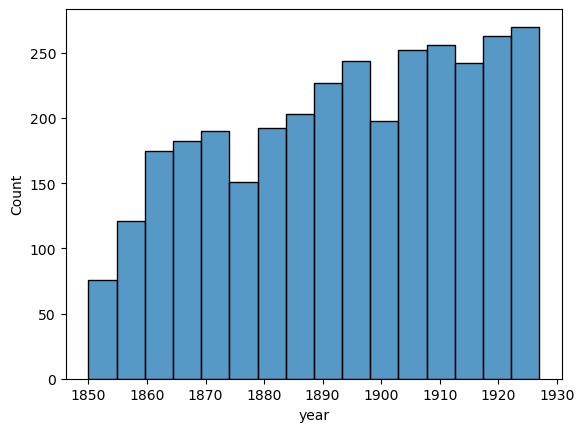

In [19]:
df_cement_nulls = df[df["cement_co2"].isnull()][["year", "cement_co2"]]

sns.histplot(data=df_cement_nulls, x="year")
plt.show()

          Count  Null    Null %  Zeros    Zeros %  Unique  Duplicated  \
year      23392     0  0.000000      0   0.000000     172         984   
coal_co2  23392     0  0.000000   6719  28.723495   10076         984   
gas_co2   23392    27  0.115424  14120  60.362517    6168         984   
oil_co2   23392     0  0.000000   2335   9.982045   10528         984   

          Under Zeros  
year                0  
coal_co2            0  
gas_co2             0  
oil_co2             0  
                                 year  coal_co2
country                                        
Namibia                             1         1
South Korea                         1         1
Puerto Rico                         1         1
Sri Lanka                           2         2
Serbia                              2         2
...                               ...       ...
Bonaire Sint Eustatius and Saba    95        95
Curacao                            95        95
Sint Maarten (Dutch part)         

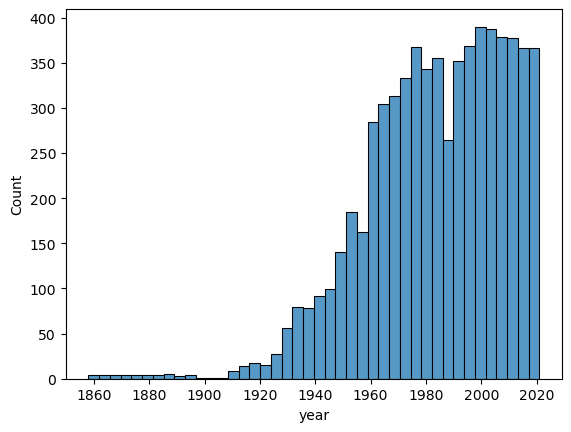

In [20]:
info_oil = pd.DataFrame({
    "Count": [df_it2.shape[0]] * len(df_it2.columns),
    "Null": df_it2.isnull().sum(),
    "Null %": df_it2.isnull().mean() * 100,
    "Zeros": (df_it2 == 0).sum(),
    "Zeros %": (df_it2 == 0).mean() * 100,
    "Unique": df_it2.nunique(),
    "Duplicated": [df_it2.duplicated().sum()] * len(df_it2.columns),
    "Under Zeros": (df_it2 < 0).sum()
}, index=df_it2.columns)

print(info_oil)

df_coal_zero = df[df["coal_co2"] == 0][["year", "coal_co2","country"]]

df_coal_zero_grouped = df_coal_zero.groupby("country").count()
print(df_coal_zero_grouped.sort_values(by="coal_co2"))

print(df_coal_zero["country"].unique())
sns.histplot(data=df_coal_zero, x="year")
plt.show()

### Unificamos criterios

los nulos pasan a ser ceros.

In [64]:
columns_to_check = ["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "land_use_change_co2", "oil_co2"]

df[columns_to_check] = df[columns_to_check].fillna(0)


info = pd.DataFrame({
    "Count": [df.shape[0]] * len(columns_to_check),
    "Null": df[columns_to_check].isnull().sum(),
    "Null %": df[columns_to_check].isnull().mean() * 100,
    "Zeros": (df[columns_to_check] == 0).sum(),
    "Zeros %": (df[columns_to_check] == 0).mean() * 100,
    "Unique": df[columns_to_check].nunique(),
    "Duplicated": [df.duplicated().sum()] * len(columns_to_check),
    "Under Zeros": (df[columns_to_check] < 0).sum()
}, index=columns_to_check)

print(info)


                     Count  Null  Null %  Zeros    Zeros %  Unique  \
cement_co2           23153     0     0.0  10298  44.478037    5261   
coal_co2             23153     0     0.0   6569  28.372133   10054   
flaring_co2          23153     0     0.0  18227  78.724139    3266   
gas_co2              23153     0     0.0  13918  60.113160    6165   
land_use_change_co2  23153     0     0.0   1831   7.908262    6992   
oil_co2              23153     0     0.0   2335  10.085086   10498   

                     Duplicated  Under Zeros  
cement_co2                    0            0  
coal_co2                      0            0  
flaring_co2                   0            0  
gas_co2                       0            0  
land_use_change_co2           0         3449  
oil_co2                       0            0  


## Comenzamos el análisis

#### How has the global trend of CO2 emissions evolved, and which periods have shown significant changes in this trajectory?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


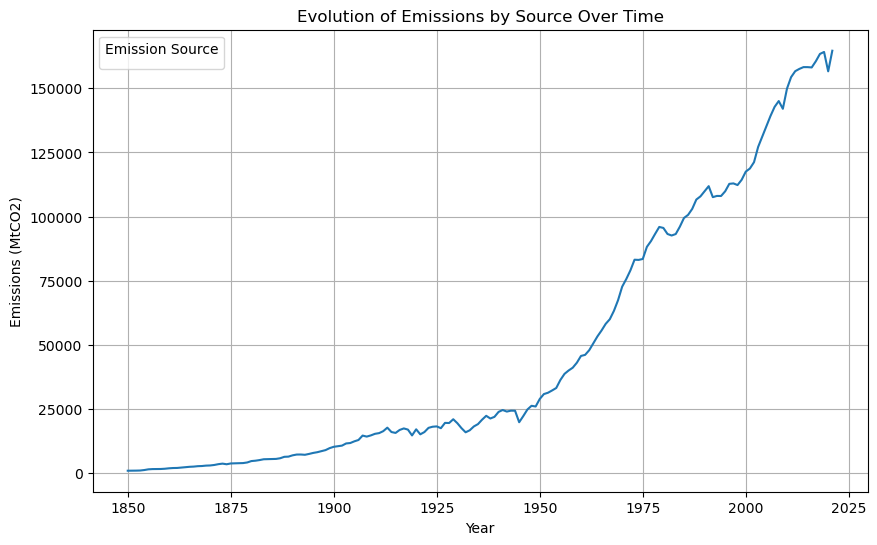

In [25]:
df_it1_grouped = df.groupby("year")['co2'].sum().reset_index()

plt.figure(figsize=(10, 6))

plt.plot(df_it1_grouped["year"], df_it1_grouped['co2'])

plt.xlabel("Year")
plt.ylabel("Emissions (MtCO2)")
plt.title("Evolution of Emissions by Source Over Time")
plt.legend(title="Emission Source")
plt.grid(True)
plt.show()

In [79]:
df_world = df[df['country'] == 'World'][["year", "coal_co2", "gas_co2", "oil_co2","cement_co2", "flaring_co2"]]
df_world

,year,coal_co2,gas_co2,oil_co2,cement_co2,flaring_co2
23064,1855,260.129,0.000,0.037,0.000,0.000
23065,1856,277.251,0.000,0.040,0.000,0.000
23066,1857,279.838,0.000,0.051,0.000,0.000
23067,1858,284.109,0.000,0.062,0.000,0.000
23068,1859,301.257,0.000,0.055,0.000,0.000
...,...,...,...,...,...,...
23226,2017,14506.974,7144.928,12242.628,1507.923,391.992
23227,2018,14746.831,7529.847,12266.017,1569.218,412.116
23228,2019,14725.978,7647.528,12345.653,1617.507,439.254
23229,2020,14174.564,7556.290,11191.809,1637.537,407.584


# Iteration 2

##### Which sectors are most responsible for emissions, and how has their contribution varied over the decades?


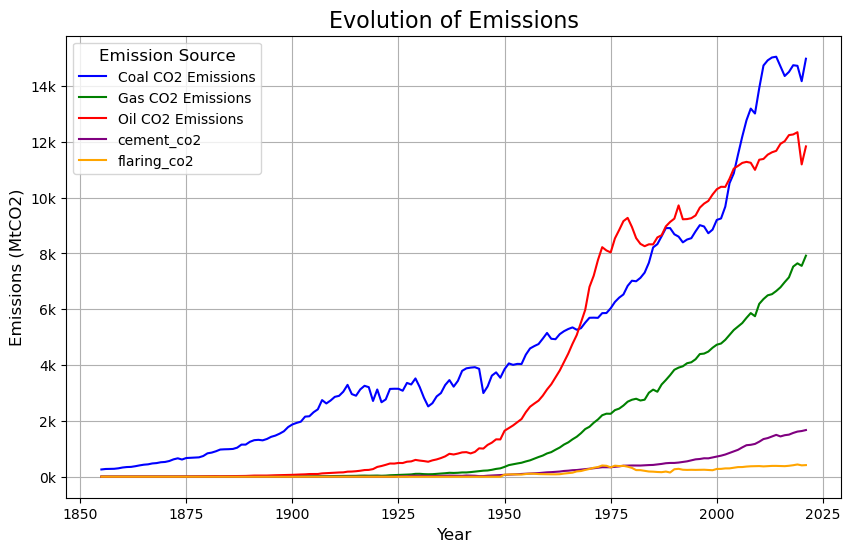

In [81]:
df_it2_grouped = df_world.groupby("year").sum().reset_index()

legend_names = {
    "coal_co2": "Coal CO2 Emissions",
    "gas_co2": "Gas CO2 Emissions",
    "oil_co2": "Oil CO2 Emissions",
    "gas_co2": "Gas CO2 Emissions",
    "oil_co2": "Oil CO2 Emissions",
}

plt.figure(figsize=(10, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, column in enumerate(df_it2_grouped.columns[1:]):
    label = legend_names.get(column, column) 
    plt.plot(df_it2_grouped["year"], df_it2_grouped[column], label=label, color=colors[i % len(colors)])

plt.xlabel("Year", fontsize=12)
plt.ylabel("Emissions (MtCO2)", fontsize=12)
plt.title("Evolution of Emissions", fontsize=16)

plt.legend(title="Emission Source", title_fontsize=12, fontsize=10)

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.grid(True)

plt.show()



In [49]:
df_world_cement_flagrant = df[df['country'] == 'World'][["cement_co2", "flaring_co2","year"]]
df_world_cement_flagrant



,cement_co2,flaring_co2,year
23064,NaN,NaN,1855
23065,NaN,NaN,1856
23066,NaN,NaN,1857
23067,NaN,NaN,1858
23068,NaN,NaN,1859
...,...,...,...
23226,1507.923,391.992,2017
23227,1569.218,412.116,2018
23228,1617.507,439.254,2019
23229,1637.537,407.584,2020


## COntribución a las emisiones mundiales por sector

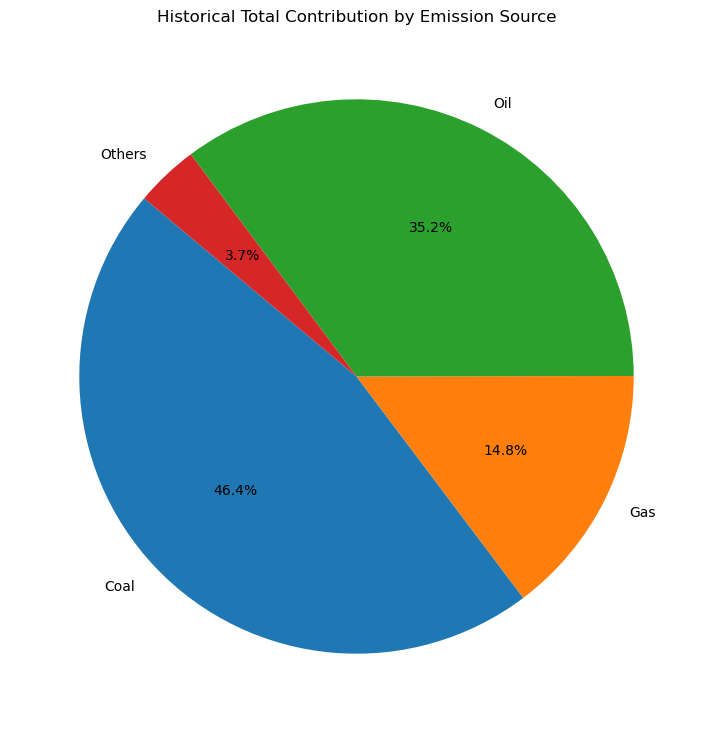

In [71]:
df_world_contribution = df[df['country'] == 'World'][["year", "coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]]
total_contributions = df_world_contribution[["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]].sum()

contributions_pie = {
    "Coal": total_contributions["coal_co2"],
    "Gas": total_contributions["gas_co2"],
    "Oil": total_contributions["oil_co2"],
    "Others": total_contributions["flaring_co2"] + total_contributions["cement_co2"]
}


plt.figure(figsize=(9, 9))
plt.pie(contributions_pie.values(), labels=contributions_pie.keys(), autopct='%1.1f%%', startangle=1 últimos 10 años40)
plt.title("Historical Total Contribution by Emission Source")
plt.show()



### contribución últimos 10 años

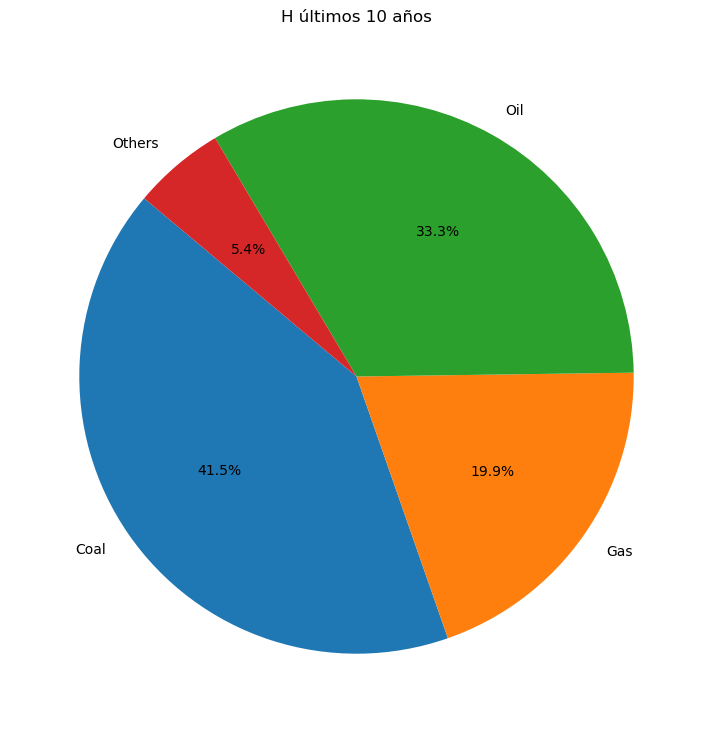

In [89]:
df_world_contribution = df[(df['country'] == 'World') & (df['year'] > 2010)][["year", "coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]]
total_contributions = df_world_contribution[["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]].sum()

contributions_pie = {
    "Coal": total_contributions["coal_co2"],
    "Gas": total_contributions["gas_co2"],
    "Oil": total_contributions["oil_co2"],
    "Others": total_contributions["flaring_co2"] + total_contributions["cement_co2"]
}


plt.figure(figsize=(9, 9))
plt.pie(contributions_pie.values(), labels=contributions_pie.keys(), autopct='%1.1f%%', startangle=140)
plt.title("H últimos 10 años")
plt.show()


Rango de años en los datos: 1850 a 2021
Valor histórico total de CO2 por fuente:
coal_co2       798551.930
gas_co2        254057.819
oil_co2        605476.731
flaring_co2     18454.288
cement_co2      45066.925
dtype: float64
Últimos 10 años en los datos: 2011 a 2021
Emisiones acumuladas de CO2 en los últimos 10 años:
coal_co2       705802.347
gas_co2        378542.532
oil_co2        560378.010
flaring_co2     20627.633
cement_co2      72694.822
dtype: float64
¡Alerta! Las emisiones de gas en los últimos 10 años son mayores que el total histórico. Revisando datos...
Valores para el gráfico:
[798551.93, 254057.81900000002, 605476.731, 18454.288, 45066.924999999996]
[705802.3470000001, 378542.532, 560378.01, 20627.633, 72694.82199999999]


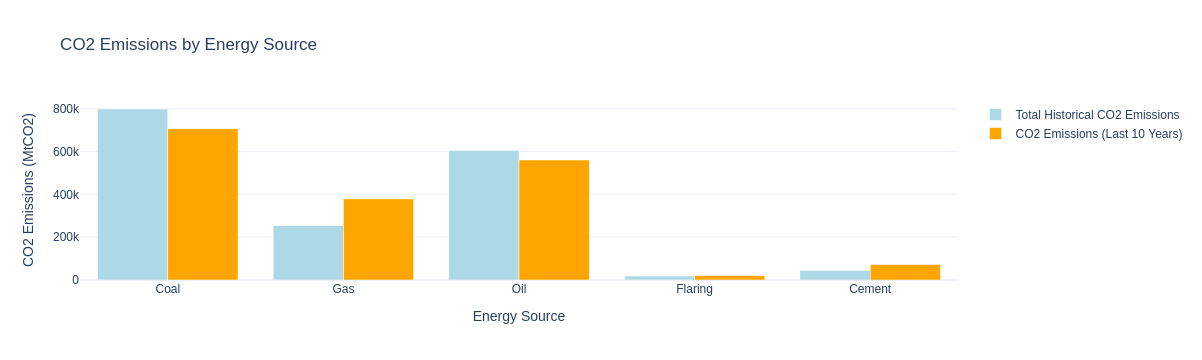

In [97]:
import pandas as pd
import plotly.graph_objects as go

# Asegurarse de que df_world_contribution está calculado con los datos completos
df_world_contribution = df[df['country'] == 'World'][["year", "coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]]

# Verificar el rango de años en los datos para asegurarnos de que no haya datos fuera de lugar
print("Rango de años en los datos:", df['year'].min(), "a", df['year'].max())

# 1. Calcular el valor histórico total de cada fuente (esto usa todos los datos disponibles)
total_contributions = df_world_contribution[["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]].sum()

# Verificar los valores históricos totales para asegurarse de que se suman correctamente
print("Valor histórico total de CO2 por fuente:")
print(total_contributions)

# 2. Filtrar los últimos 10 años
last_10_years = df[df['year'] >= (df['year'].max() - 10)]

# Verificar que el filtro para los últimos 10 años está funcionando correctamente
print("Últimos 10 años en los datos:", last_10_years['year'].min(), "a", last_10_years['year'].max())

# 3. Sumar las emisiones de los últimos 10 años para cada fuente
last_10_years_total = last_10_years[["coal_co2", "gas_co2", "oil_co2", "flaring_co2", "cement_co2"]].sum()

# Verificar los valores de los últimos 10 años
print("Emisiones acumuladas de CO2 en los últimos 10 años:")
print(last_10_years_total)

# Verificar si hay alguna anomalía en los valores
if last_10_years_total["gas_co2"] > total_contributions["gas_co2"]:
    print("¡Alerta! Las emisiones de gas en los últimos 10 años son mayores que el total histórico. Revisando datos...")

# Crear un DataFrame para organizar los valores para el gráfico
sources = ['Coal', 'Gas', 'Oil', 'Flaring', 'Cement']
historical_values = [total_contributions["coal_co2"], total_contributions["gas_co2"], total_contributions["oil_co2"],
                     total_contributions["flaring_co2"], total_contributions["cement_co2"]]
last_10_years_values = [last_10_years_total["coal_co2"], last_10_years_total["gas_co2"], last_10_years_total["oil_co2"],
                        last_10_years_total["flaring_co2"], last_10_years_total["cement_co2"]]

# Verificar los valores antes de graficar
print("Valores para el gráfico:")
print(historical_values)
print(last_10_years_values)

# Crear el gráfico de barras
fig = go.Figure()

# Barra para el valor histórico total
fig.add_trace(go.Bar(
    x=sources,
    y=historical_values,
    name="Total Historical CO2 Emissions",
    marker_color='lightblue'
))

# Barra para el valor acumulado de los últimos 10 años
fig.add_trace(go.Bar(
    x=sources,
    y=last_10_years_values,
    name="CO2 Emissions (Last 10 Years)",
    marker_color='orange'
))

# Añadir título y etiquetas
fig.update_layout(
    title="CO2 Emissions by Energy Source",
    barmode='group',
    xaxis_title="Energy Source",
    yaxis_title="CO2 Emissions (MtCO2)",
    xaxis=dict(tickmode='array', tickvals=sources),
    template="plotly_white"
)

# Mostrar el gráfico
fig.show()
